In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the datasets
appearances = pd.read_excel('appearances.xlsx')
game_events = pd.read_excel('game_events.xlsx')
game_lineups = pd.read_excel('game_lineups.xlsx')
games = pd.read_excel('games.xlsx')
players = pd.read_excel('players.xlsx')
test_data = pd.read_excel('test data.xlsx')



In [163]:
data=[appearances,game_events,game_lineups,games,players,test_data]
data_=["appearances_","game_events_","game_lineups_","games_","players_","test_data_"]
b=0
for i in data:
    print("_______________________________________________________________")
    print(f"{data_[b]}:{i.shape}\n")
    b=b+1
    a=0
    
    for j in i.columns:
        print(f"{i.columns[a]} : {i[j].nunique()}")
        a+=1

_______________________________________________________________
appearances_:(3568, 11)

appearance_id : 3568
game_id : 3268
player_id : 92
date : 1267
player_name : 92
competition_id : 31
yellow_cards : 3
red_cards : 2
goals : 5
assists : 3
minutes_played : 90
_______________________________________________________________
game_events_:(1849, 9)

game_event_id : 1849
date : 1018
game_id : 1582
minute : 102
type : 3
player_id : 77
description : 257
player_in_id : 669
player_assist_id : 86
_______________________________________________________________
game_lineups_:(219, 8)

game_lineups_id : 219
game_id : 202
type : 2
number : 23
player_id : 27
player_name : 27
team_captain : 2
position : 11
_______________________________________________________________
games_:(3268, 20)

game_id : 3268
competition_id : 31
season : 9
round : 84
date : 1267
home_club_goals : 10
away_club_goals : 10
home_club_position : 20
away_club_position : 21
home_club_manager_name : 580
away_club_manager_name : 55

In [27]:
data=[players,games,game_lineups,game_events,appearances,test_data]
for i in data:
    print('shape for', i.shape)
    #print(i.isnull().sum())
    #print(f"{i.isnull().sum()>0}")

shape for (152, 15)
shape for (3268, 20)
shape for (219, 8)
shape for (1849, 9)
shape for (3568, 11)
shape for (2, 49)


In [4]:
# Merging the datasets based on 'game_id'
# Start by merging 'games' with 'game_lineups'
merged_data = games.merge(game_lineups, on='game_id', how='left')

# Merge the result with 'game_events'
merged_data = merged_data.merge(game_events, on='game_id', how='left')

# Merge the result with 'appearances'
merged_data = merged_data.merge(appearances, on='game_id', how='left')

# Since 'players' contain 'player_id' that could relate to players in 'appearances',
# we merge on 'player_id' as well to bring in detailed player information
merged_data = merged_data.merge(players, on='player_id', how='left', suffixes=('_game', '_player'))

# Viewing the merged data structure and the first few rows to verify
print(merged_data.info())
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   game_id                      3809 non-null   int64         
 1   competition_id_x             3809 non-null   object        
 2   season                       3809 non-null   int64         
 3   round                        3809 non-null   object        
 4   date_x                       3809 non-null   datetime64[ns]
 5   home_club_goals              3809 non-null   int64         
 6   away_club_goals              3809 non-null   int64         
 7   home_club_position           3259 non-null   float64       
 8   away_club_position           3259 non-null   float64       
 9   home_club_manager_name       3803 non-null   object        
 10  away_club_manager_name       3803 non-null   object        
 11  stadium                      3809 non-null 

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,country_of_birth,date_of_birth,sub_position,position_player,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,UdSSR,1988-11-17,Centre-Forward,Attack,right,175.0,NaN,500000.0,NaT,Prosport
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,United States,1986-06-25,Centre-Forward,Attack,right,178.0,NaN,2200000.0,NaT,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN


In [6]:
merged_data.isnull().sum()

game_id                           0
competition_id_x                  0
season                            0
round                             0
date_x                            0
home_club_goals                   0
away_club_goals                   0
home_club_position              550
away_club_position              550
home_club_manager_name            6
away_club_manager_name            6
stadium                           0
attendance                      141
referee                           5
home_club_formation            3809
away_club_formation            3809
home_club_name                  128
away_club_name                   68
aggregate                         0
competition_type                  0
game_lineups_id                3809
type_x                         3809
number                         3809
player_id_x                    3809
player_name_x                  3809
team_captain                   3809
position_game                  3809
game_event_id               

In [7]:
# Identify potentially redundant columns by checking for high percentages of null values or irrelevant information
#I've removing the high missing(above 50%) value column because this column have high missing value ant it wont give proper analysis so i've removed it
column_null_percentages = merged_data.isnull().mean() * 100
columns_to_drop = column_null_percentages[column_null_percentages > 50].index.tolist()
cleaned_data = merged_data.drop(columns=columns_to_drop)
print(column_null_percentages,'\n',columns_to_drop)
cleaned_data.head()

game_id                          0.000000
competition_id_x                 0.000000
season                           0.000000
round                            0.000000
date_x                           0.000000
home_club_goals                  0.000000
away_club_goals                  0.000000
home_club_position              14.439485
away_club_position              14.439485
home_club_manager_name           0.157522
away_club_manager_name           0.157522
stadium                          0.000000
attendance                       3.701759
referee                          0.131268
home_club_formation            100.000000
away_club_formation            100.000000
home_club_name                   3.360462
away_club_name                   1.785245
aggregate                        0.000000
competition_type                 0.000000
game_lineups_id                100.000000
type_x                         100.000000
number                         100.000000
player_id_x                    100

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,country_of_birth,date_of_birth,sub_position,position_player,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,UdSSR,1988-11-17,Centre-Forward,Attack,right,175.0,NaN,500000.0,NaT,Prosport
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,United States,1986-06-25,Centre-Forward,Attack,right,178.0,NaN,2200000.0,NaT,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN


In [8]:

# Handle null values: fill numeric columns with the median and categorical with the mode
# Filling missing values with the median ensures that the filled value is actually one that appeared in the data, which may not
#be the case with the mean, especially if the data points are discrete or represent counts.
for column in cleaned_data.columns:
    if cleaned_data[column].dtype in ['int64', 'float64']:  # Numeric columns
        cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)
    else:  # Categorical columns
        cleaned_data[column].fillna(cleaned_data[column].mode()[0], inplace=True)
        
cleaned_data.isnull().sum()

game_id                        0
competition_id_x               0
season                         0
round                          0
date_x                         0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
appearance_id                  0
player_id                      0
date                           0
player_name_y                  0
competition_id_y               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
name                           0
last_season                    0
current_cl

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'game_id'),
  Text(1, 0, 'season'),
  Text(2, 0, 'home_club_goals'),
  Text(3, 0, 'away_club_goals'),
  Text(4, 0, 'home_club_position'),
  Text(5, 0, 'away_club_position'),
  Text(6, 0, 'attendance'),
  Text(7, 0, 'player_id'),
  Text(8, 0, 'yellow_cards'),
  Text(9, 0, 'red_cards'),
  Text(10, 0, 'goals'),
  Text(11, 0, 'assists'),
  Text(12, 0, 'minutes_played'),
  Text(13, 0, 'last_season'),
  Text(14, 0, 'current_club_id'),
  Text(15, 0, 'height_in_cm'),
  Text(16, 0, 'market_value_in_eur'),
  Text(17, 0, 'highest_market_value_in_eur')])

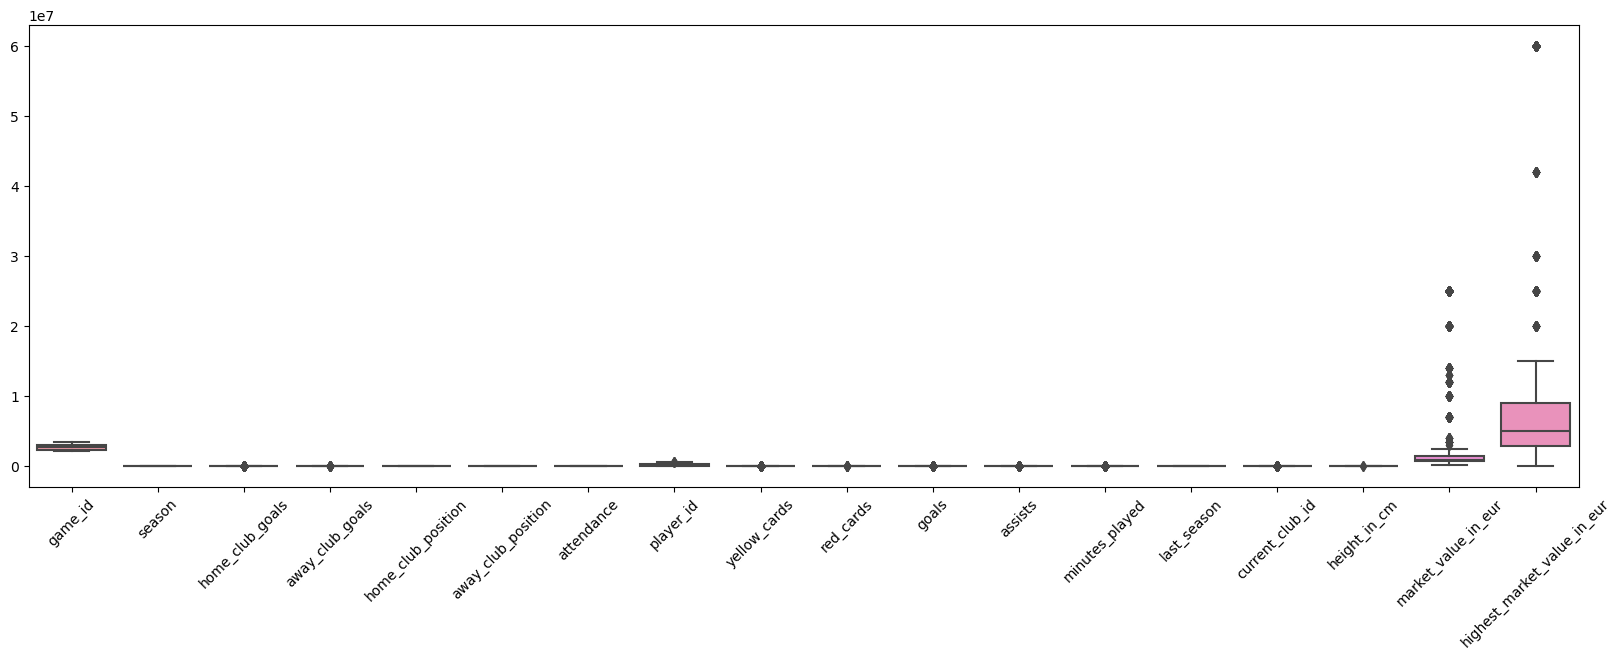

In [9]:

#Outlier Treatment
sns.boxplot(data= cleaned_data)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)


In [13]:
# seperate numeric column for outliers treatment
num=[]
for i in cleaned_data.columns:
    if cleaned_data[i].dtype == 'int64' or cleaned_data[i].dtype== 'float64':    
        num.append(i)
num

['game_id',
 'season',
 'home_club_goals',
 'away_club_goals',
 'home_club_position',
 'away_club_position',
 'attendance',
 'player_id',
 'yellow_cards',
 'red_cards',
 'goals',
 'assists',
 'minutes_played',
 'last_season',
 'current_club_id',
 'height_in_cm',
 'market_value_in_eur',
 'highest_market_value_in_eur']

In [17]:
#Outlier Treatment- winsorization
def iqr_winsorization(cleaned_data, threshold=1.5):
    for col in num: 
        q1=cleaned_data[col].quantile(0.25) 
        q3=cleaned_data [col].quantile(0.75) 
        iqr=q3-q1
        lf=q1-threshold*iqr 
        uf=q3+threshold*iqr
        cleaned_data.loc[cleaned_data [col]<lf, col]=lf
        cleaned_data.loc [cleaned_data [col] >uf, col]=uf
    
    return cleaned_data

cleaned_data=iqr_winsorization(cleaned_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'game_id'),
  Text(1, 0, 'season'),
  Text(2, 0, 'home_club_goals'),
  Text(3, 0, 'away_club_goals'),
  Text(4, 0, 'home_club_position'),
  Text(5, 0, 'away_club_position'),
  Text(6, 0, 'attendance'),
  Text(7, 0, 'player_id'),
  Text(8, 0, 'yellow_cards'),
  Text(9, 0, 'red_cards'),
  Text(10, 0, 'goals'),
  Text(11, 0, 'assists'),
  Text(12, 0, 'minutes_played'),
  Text(13, 0, 'last_season'),
  Text(14, 0, 'current_club_id'),
  Text(15, 0, 'height_in_cm'),
  Text(16, 0, 'market_value_in_eur'),
  Text(17, 0, 'highest_market_value_in_eur')])

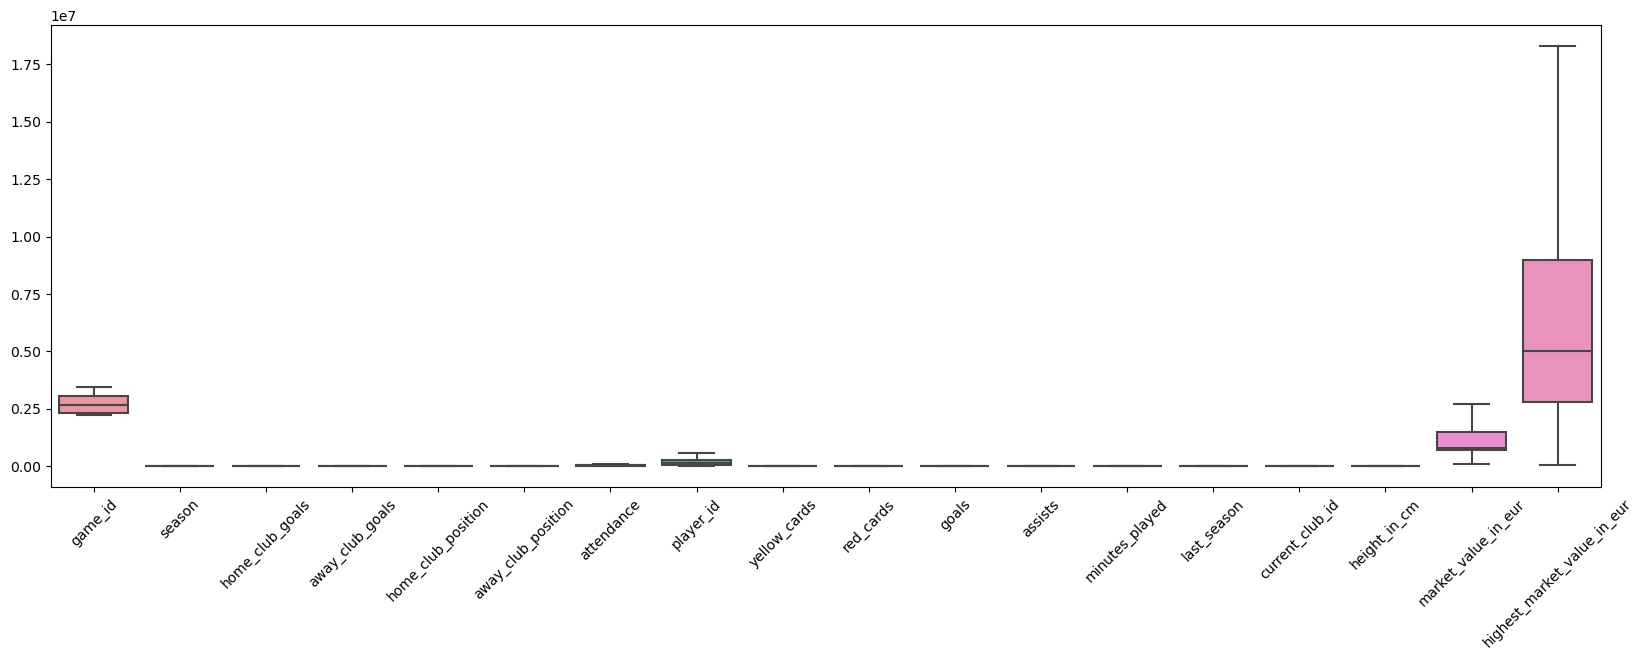

In [18]:

# after Outlier Treatment
sns.boxplot(data= cleaned_data)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation= 45)


In [22]:
# Save the cleaned data to CSV
cleaned_data.to_csv('Football_data_merged_cleaned.csv', index=False)